In [16]:
import cv2
import numpy as np

In [32]:
def enhance_contrast(image_path):
    # 이미지 읽어들이기
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 대비를 강화하기 위해 CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16, 16))
    enhanced_img = clahe.apply(img)

    return enhanced_img

In [21]:
def enhance_contours(image_path):
    # 이미지 읽어들이기
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지의 크기를 2의 제곱수로 조정
    rows, cols = img.shape
    nrows = cv2.getOptimalDFTSize(rows)
    ncols = cv2.getOptimalDFTSize(cols)
    padded = cv2.copyMakeBorder(img, 0, nrows - rows, 0, ncols - cols, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # 푸리에 변환 수행
    dft = cv2.dft(np.float32(padded), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # 고주파 필터 생성 (저주파를 아주 조금만 제거하여 윤곽을 약간 강조)
    mask = np.ones((nrows, ncols, 2), np.uint8)
    center_row, center_col = nrows // 2, ncols // 2
    mask[center_row - 5:center_row + 5, center_col - 5:center_col + 5] = 0.98  # 조절 가능한 강도

    # 마스크 적용
    fshift = dft_shift * mask

    # 역 푸리에 변환
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # 결과 이미지 자르기
    img_back = img_back[:rows, :cols]

    # 이미지 스케일 조정
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # 결과 반환
    return img_back

In [2]:
from PIL import Image

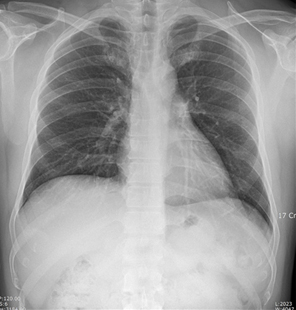

In [27]:
Image.open('chest_x1.jpg')

In [8]:
import numpy as np
np.array(Image.open('chest_x1.jpg')).shape

(310, 296, 3)

In [10]:
from google.colab.patches import cv2_imshow

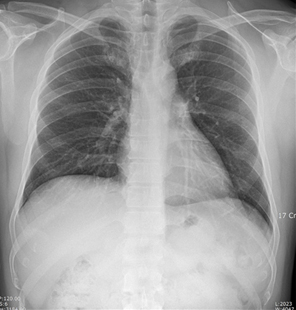

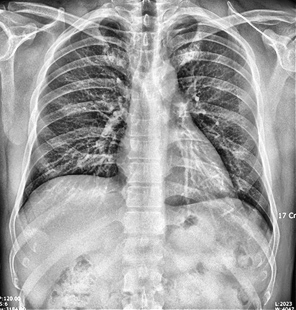

In [33]:

# 이미지 경로
image_path = 'chest_x1.jpg'

# 윤곽 개선된 이미지 얻기
enhanced_image = enhance_contrast(image_path)

# 결과 보기
cv2_imshow(cv2.imread(image_path))
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [31]:
cv2.imwrite('/content/a.jpg', enhanced_image)

True